# Objective

The aim of this project is to build a basic chatbot using Hugging Face lab. We would be utilizing a pre-trained model called 'facebook/blenderbot-400M-distill'.

# Introduction

## Operation of a Chatbot
A chatbot is like a digital assistant that uses a combination of advanced computer programs called transformers and language models (LLMs) to communicate with users through text. The transformers act as the chatbot's "brain," while the LLMs are its "language understanding" component.

When you input a message, the transformer helps the chatbot break it down into smaller pieces called tokens, which are easier for the chatbot to process. These tokens are then passed to the LLM, which has been trained on a vast amount of text data to understand language patterns and meanings.

Based on its understanding of the message, the LLM generates a response that makes sense in the context of the conversation. The transformer then converts this response into a format that can be easily delivered back to you.

This process continues iteratively as the conversation unfolds. Each new input message is processed, understood by the LLM, and used to generate a relevant response.

Essentially, the chatbot leverages the language model's knowledge of human conversations and patterns to generate meaningful responses. The transformer aids in handling the technical aspects of input/output, allowing the language model to focus on understanding and generating language in a coherent and contextually appropriate manner.

   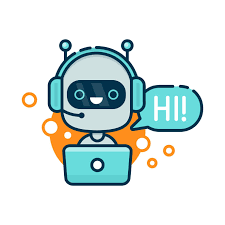

# Installing Requirements

We will be using the 'transformers' Python library from Hugging Face Lab, which is an open-source natural language processing (NLP) toolkit with many useful features.

pip install transformers

# Import Required Tools from the Transformers Library

We will be using 'AutoTokenizer' and 'AutoModelForSeq2SeqLM' from the 'transformers' library.

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM

/Users/arfsyed/Documents/Development/Hackathon/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Fetching the Model and Initializing a Tokenizer

We will be using "facebook/blenderbot-400M-distill" because it has an open-source license and runs relatively fast.

In [3]:
import warnings
warnings.filterwarnings("ignore")
model_name = "microsoft/DialoGPT-medium"
model = AutoModelForCausalLM.from_pretrained(model_name)

2023-09-29 10:23:55.065138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Encoding Conversation History and Prompt from User

In [5]:
#Storing the Conversation History in a List
conversation_history = []

During each interaction, we will pass our conversation history to the model along with our input so that it may also reference the previous conversation when generating the next answer. The transformers library function we are using expects to receive the conversation history as a string, with each element separated by the newline character '\n'. Thus, we create such a string. We'll use the join() method to do that. (Initially, our history_string will be an empty string and will grow as the conversation goes on).

In [6]:
history_string = "\n".join(conversation_history)

In [7]:
#Using a simple input text to test
input_text = "hello"

# Tokenization of User Prompt and Chat History

Tokenization converts user inputs/ prompt into a form, understandable by the model.

In [8]:
chat_history_ids = []
new_user_input_ids = []
inputs = tokenizer.encode(input_text + tokenizer.eos_token, return_tensors="pt")
bot_input_ids = inputs

# Generate Ouput From The Model

In [9]:
output = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


# Decode Output

Detokenization is the process of combining or merging individual tokens back into their original form, typically to reconstruct the original text or sentence.

In [10]:
response = tokenizer.decode(output[0], skip_special_tokens=True).strip()
response

'helloHello! :D'

We've successfully had an interaction with our chatbot, we've given it a prompt, and we received its response. Next, we update our conversation history, so that we may pass it with the next iteration.

# Update Conversation History

In [11]:
conversation_history.append(input_text)
conversation_history.append(response)
conversation_history

['hello', 'helloHello! :D']

# Conclusion

We have built a basic chatbot using Hugging Face lab by utilizing a pre-trained model called 'facebook/blenderbot-400M-distill'. To repeat the process and keep it going in a loop, you can use a while loop for that: 
- while True:
    - #Create conversation history string
    - history_string = "\n".join(conversation_history)
    - #Get the input data from the user
    - input_text = input("> ")
    - #Tokenize the input text and history
    - inputs = tokenizer.encode_plus(history_string, input_text, return_tensors="pt")
    - #Generate the response from the model
    - outputs = model.generate(**inputs)
    - #Decode the response
    - response = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    - #Add interaction to conversation history
    - conversation_history.append(input_text)
    - conversation_history.append(response)

This ensures the process keeps getting repeated with each new prompt/ input. There are many other models out there to try based on the project and its requirements, this was a short tutorial to help gain some understanding of how chatbots work. Happy learning!

Test
- i = 0
- while i < 5:
    - #Create conversation history string
    - history_string = "\n".join(conversation_history)
    - #Get the input data from the user
    - input_text = input("> ")
    - #Tokenize the input text and history
    - inputs = tokenizer.encode_plus(history_string, input_text, return_tensors="pt")
    - #Generate the response from the model
    - output = model.generate(**inputs)
    - #Decode the response
    - response = tokenizer.decode(output[0], skip_special_tokens=True).strip()
    - #Add interaction to conversation history
    - print("Bot: ", response)
    - conversation_history.append(input_text)
    - conversation_history.append(response)
    - i+=1

In [27]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

hf_name = "microsoft/DialoGPT-medium"
tokenizer = AutoTokenizer.from_pretrained(hf_name)
model = AutoModelForCausalLM.from_pretrained(hf_name)


In [28]:

# Let's chat for 5 lines
for step in range(1):
    # encode the new user input, add the eos_token and return a tensor in Pytorch
    user_input = input(">> User:")
    print(">>User Input: ", user_input)
    new_user_input_ids = tokenizer.encode(user_input + tokenizer.eos_token, return_tensors='pt')

    # append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

    # generated a response while limiting the total chat history to 1000 tokens, 
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # pretty print last ouput tokens from bot
    print(">>DialogPT: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


>>User Input:  Hi there!
>>DialogPT: Hi! :D


from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

hf_name = "togethercomputer/GPT-NeoXT-Chat-Base-20B"
tokenizer = AutoTokenizer.from_pretrained(hf_name)
model = AutoModelForCausalLM.from_pretrained(hf_name)


# Let's chat for 5 lines
for step in range(1):
    # encode the new user input, add the eos_token and return a tensor in Pytorch
    user_input = input(">> User:")
    print(">>User Input: ", user_input)
    new_user_input_ids = tokenizer.encode(user_input + tokenizer.eos_token, return_tensors='pt')

    # append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

    # generated a response while limiting the total chat history to 1000 tokens, 
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # pretty print last ouput tokens from bot
    print(">>DialogPT: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))
